INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


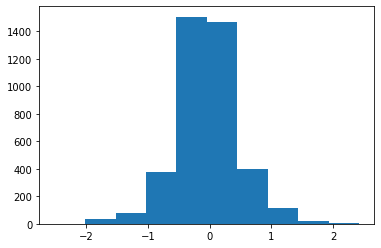

In [53]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


normal = pd.read_csv('https://raw.githubusercontent.com/KAIR-ISZ/public_lectures/master/Data%20Analytics%202022/Lab%203%20-%20Probability%20distribution/normal.csv', index_col=0, header=0)
divergence = CmdStanModel(stan_file='stan1.stan')
divergence_sample = divergence.sample(data={'N':1, 'y':[normal['value'][0]]})
plt.hist(divergence_sample.stan_variable('mu'))
plt.show()


In [54]:
coin = pd.read_csv('https://raw.githubusercontent.com/KAIR-ISZ/public_lectures/master/Data%20Analytics%202022/Lab%203%20-%20Probability%20distribution/coin.csv')
model = CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : len(coin['Toss_Result']), "y" : coin['Toss_Result'].to_list()}, 
                            seed = 9012022,
                            chains = 4)
result.summary()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01800,0.720,-290.00,-290.00,-290.0,1600.0,23000.0,1.0
theta,0.46,0.00066,0.025,0.42,0.46,0.5,1400.0,20000.0,1.0


array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

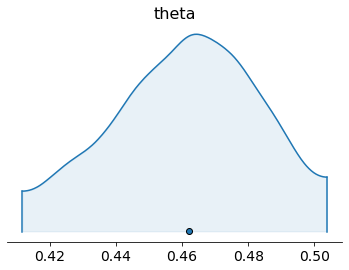

In [55]:
arviz_result = az.from_cmdstanpy(
    posterior=result,
)
arviz_result

az.plot_density(arviz_result,shade=0.1)


In [56]:
data = pd.read_csv("https://raw.githubusercontent.com/KAIR-ISZ/public_lectures/master/Data%20Analytics%202022/Lab%203%20-%20Probability%20distribution/normal.csv")#, index_col="Unnamed: 0")
y=(data.value)
N=(len(data.value))
model = CmdStanModel(stan_file='stan3.stan')
result = model.sample(data={'N': N, 'y': y}, 
                            seed = 9012022,
                            chains = 4)
result.summary()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-53.0000,0.0250,1.100,-55.00,-53.0000,-52.00,1700.0,4100.0,1.0
mu,-0.0350,0.0020,0.110,-0.21,-0.0340,0.14,2800.0,6600.0,1.0
sigma,1.0000,0.0013,0.073,0.91,1.0000,1.20,3100.0,7300.0,1.0
y_rep[1],-0.0290,0.0160,1.000,-1.70,-0.0360,1.70,4259.0,10092.0,1.0
y_rep[2],-0.0530,0.0160,1.000,-1.70,-0.0710,1.70,4170.0,9881.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],-0.0330,0.0170,1.000,-1.70,-0.0340,1.60,3868.0,9165.0,1.0
y_rep[97],-0.0520,0.0170,1.000,-1.80,-0.0610,1.70,3928.0,9309.0,1.0
y_rep[98],-0.0080,0.0170,1.000,-1.70,-0.0180,1.70,3928.0,9308.0,1.0


In [57]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<AxesSubplot:xlabel='y / y_rep'>

C:\Users\macie\anaconda3\envs\data\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


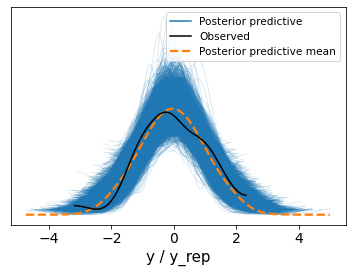

In [58]:
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})


In [59]:
model = CmdStanModel(stan_file='stan4.stan')
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )
result.summary()
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

(-4.0, 4.0, 0.0, 1.0)

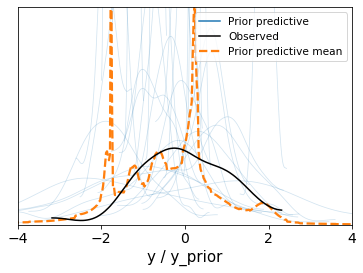

In [60]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)
plt.axis([-4,4,0,1])

<AxesSubplot:>

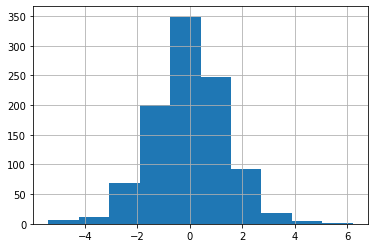

In [61]:
df=arviz_result.prior_predictive.y_prior.to_dataframe()
y_prior=result.draws_pd().drop(columns=["lp__","accept_stat__","mu","sigma"])
y_prior["y_prior[1]"].hist()